<a href="https://colab.research.google.com/github/GabrielMtzSoltero/SSPIAII/blob/main/04_clasificadorBianrio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [8]:
#leer el archivo
dataFilePath = 'heart.csv'

dataFrame = pd.read_csv(dataFilePath)

In [11]:
#un vistazo a los datos con los que trabajaremos
dataFrame.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
#revisamos que no haya nulos
dataFrame.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

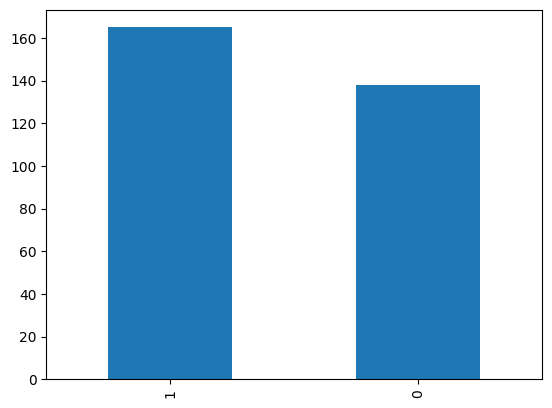

In [14]:
ax = dataFrame['target'].value_counts().plot(kind='bar');

#preparar la entrada y la posible salida
y = dataFrame["target"].values

x = dataFrame.drop(["target"], axis = 1)

In [15]:
#SPlitting into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

#creamos el modelo de un Perceptron multicapa
model=MLPClassifier(alpha=1, max_iter=2000)
#a entrenar
model.fit(xtrain, ytrain)

#revisar el score de los modelos en entrenamiento y en test
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

Train:  0.7783018867924528
Test:  0.7912087912087912


In [29]:
#sacar la prediccion en la parte del test
ytestpred = model.predict(xtest)
ytrainpred = model.predict(xtrain)
#sacar el reporte de clasificacion
print('Classification report: \n', classification_report(ytest, ytestpred))
class_names=["no sano"," sano"]


Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



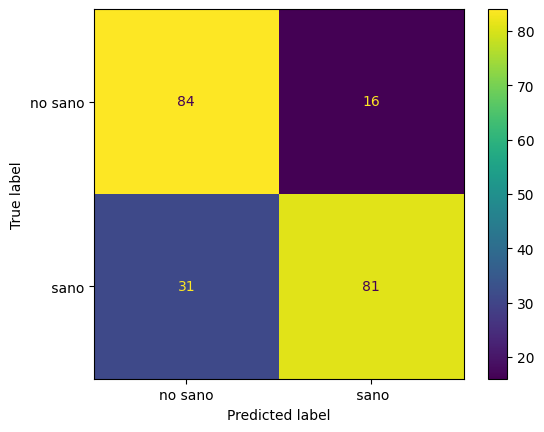

In [30]:
#class_names=["no sano"," sano"]
cm = confusion_matrix(ytrain, ytrainpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
#disp.ax_.set_title("Confusion matrix, without normalization")
disp.plot()


**La precision** representa  la proporción entre el número de predicciones correctas y el total de predicciones. Se calcula:
\begin{equation}
    Precision=VP/(VP+FP)
\end{equation}

donde $VP$ son los verdaderos positivos (los que clasifico bien) y $FP$ son los falsos verdaderos (los que me clasificó en la clase que estoy evaluando pero que no son de ahí).

**La sensivilidad** (Recall)También se conoce como Tasa de Verdaderos Positivos o Recall. Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.
Se calcula:  
\begin{equation}
Recall=VP/(VP+FN)
\end{equation}

donde $VP$ son los verdaderos positivos (los que clasifico bien) y $FN$ son los falsos negativos (los que clasificó en otra clase diferente a la que estoy evaluando).

**El F1 score** combina precisión y sensibilidad en una sola métrica. (Precision y Recall en una sóla metrica) por ello es de gran utilidad cuando la distribución de las clases es desigual.El rango va de 0 a 1. Un mayor valor indica una mayor exactitud predictiva. Se calcula

\begin{equation}
F1 score=2 ( Precision * Recall) / (Precision + Recall)
\end{equation}


**Tips Finales**
*   Los Falsos positivos es la suma de los valores de una columna sin tomar en cuenta el valor en la diagonal principal
*   Los Falsos negativos es la suma de los valores de una fila sin tomar en cuenta el valor de la diagonal principal



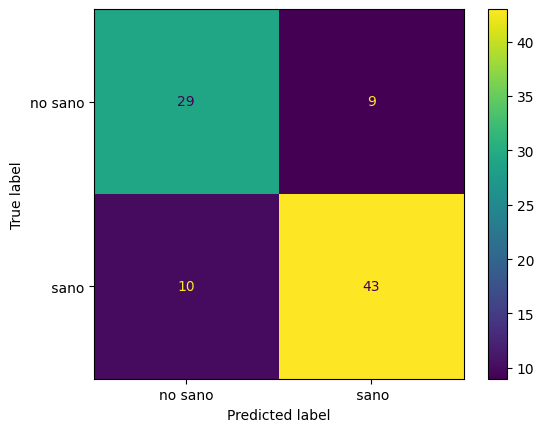

In [27]:

#class_names=["no sano"," sano"]
cm = confusion_matrix(ytest, ytestpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
#disp.ax_.set_title("Confusion matrix, without normalization")
disp.plot()




In [ ]:
#